<a href="https://colab.research.google.com/github/ONowakowski/howToDataInPython/blob/master/pandas_how_to_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [ ]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [ ]:
#warto pracowac na kopii obiektu, by moc zawsze wrocic do oryginalu
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [ ]:
#usuwam niepotrzebne kolumny
df = df.drop(columns=['URL', 'Subtitle', 'Icon URL', 'In-app Purchases', 'Description'])
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [ ]:
#ustawiam ID jako indeks obiektu
df = df.set_index('ID')
df.head()

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [ ]:
df.describe().T #opis danych numerycznych

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.5,4.5,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,46.0,309.0,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,56768954.0,133027072.0,4.005591e+09


In [ ]:
df.describe(include=['object']).T #opis danych tekstowych

,count,unique,top,freq
Name,17007,16847,Car Driving On Impossible Trac,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [ ]:
#zmieniam nazwy kolumn na male litery oraz zamieniam spacje na podkreslenie
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019


#Rozkład zmiennej

In [ ]:
df.primary_genre

ID
284921427     Games
284926400     Games
284946595     Games
285755462     Games
285831220     Games
              ...  
1474626442    Games
1474919257    Games
1474962324    Games
1474963671    Games
1475076711    Games
Name: primary_genre, Length: 17007, dtype: object

In [ ]:
df.primary_genre.value_counts() #policzenie ile danych wartosci jest

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Travel                   1
Shopping                 1
Name: primary_genre, dtype: int64

In [ ]:
df.primary_genre.value_counts().nlargest(5) #5 najwiekszych wartosci

Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Name: primary_genre, dtype: int64

In [ ]:
list(df.primary_genre.value_counts().nlargest(5).index)

['Games', 'Education', 'Entertainment', 'Utilities', 'Sports']

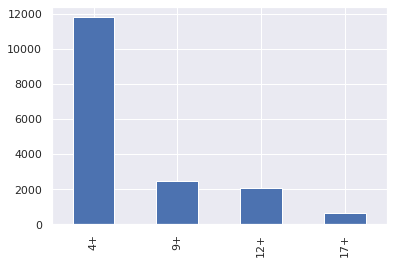

In [ ]:
#wykres wymaganego wieku
import seaborn as sns
sns.set()

df.age_rating.value_counts().plot(kind='bar')

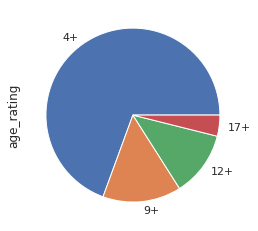

In [ ]:
_ = df.age_rating.value_counts().plot(kind='pie') #podkreslnik zeby nie wyswietlal sie komunikat na gorze

In [ ]:
#chcemy dolaczyc kolumne z iloscia dostepnych jezykow w aplikacji
df.languages #jezyki sa przekazane jako tekst, oddzielone ', '

ID
284921427     DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
284926400                                                    EN
284946595                                                    EN
285755462     DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
285831220     DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                                    ...                        
1474626442                                                   EN
1474919257                                                   EN
1474962324                                                   EN
1474963671                                                   EN
1475076711                                               EN, ZH
Name: languages, Length: 17007, dtype: object

In [ ]:
df.languages.str.split(', ') #jezyki przedstawione jako lista

ID
284921427     [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
284926400                                                  [EN]
284946595                                                  [EN]
285755462     [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
285831220     [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
                                    ...                        
1474626442                                                 [EN]
1474919257                                                 [EN]
1474962324                                                 [EN]
1474963671                                                 [EN]
1475076711                                             [EN, ZH]
Name: languages, Length: 17007, dtype: object

In [ ]:
df.languages.str.split(', ').str.len() #ilosc jezykow w kazdej liscie

ID
284921427     17.0
284926400      1.0
284946595      1.0
285755462     17.0
285831220     15.0
              ... 
1474626442     1.0
1474919257     1.0
1474962324     1.0
1474963671     1.0
1475076711     2.0
Name: languages, Length: 17007, dtype: float64

In [ ]:
df['num_lang'] = df.languages.str.split(', ').str.len() #stworzenie nowej kolumny
df.sample(5)

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
ID,,,,,,,,,,,,,
1259664290,Sudoku Zen Premium,NaN,NaN,0.99,Qingfeng Yang,4+,EN,17480704.0,Games,"Games, Entertainment, Puzzle, Strategy",15/07/2017,8/01/2019,1.0
1325923640,Dungeon Builder M,NaN,NaN,5.99,KE HSI LIN,4+,"EN, ZH, ZH",53124096.0,Games,"Games, Strategy, Simulation",16/12/2017,14/07/2018,3.0
1347031162,City Frontline War Commandos,NaN,NaN,0.00,Vu Hoang Anh,17+,EN,91410432.0,Games,"Games, Entertainment, Strategy, Role Playing",9/02/2018,9/02/2018,1.0
1237587855,100 Pukky - Balloon popper,NaN,NaN,0.00,BrotherSoft,4+,EN,18803712.0,Games,"Games, Entertainment, Casual, Strategy",26/05/2017,6/07/2019,1.0
1468722554,Circle Blast!,NaN,NaN,0.00,Heidi Lau,9+,EN,61357056.0,Games,"Games, Strategy, Action",20/06/2019,23/06/2019,1.0


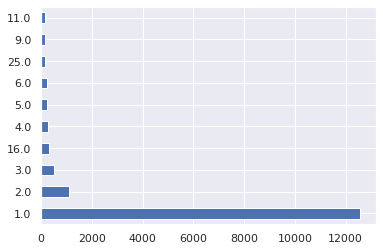

In [ ]:
_ = df.num_lang.value_counts().nlargest(10).plot(kind='barh')

#Sprawdzanie braków danych

In [ ]:
df.info() #tu mozna zauwazyc czy sa braki

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          17007 non-null  object 
 1   average_user_rating           7561 non-null   float64
 2   user_rating_count             7561 non-null   float64
 3   price                         16983 non-null  float64
 4   developer                     17007 non-null  object 
 5   age_rating                    17007 non-null  object 
 6   languages                     16947 non-null  object 
 7   size                          17006 non-null  float64
 8   primary_genre                 17007 non-null  object 
 9   genres                        17007 non-null  object 
 10  original_release_date         17007 non-null  object 
 11  current_version_release_date  17007 non-null  object 
 12  num_lang                      16947 non-null  f

In [ ]:
df.average_user_rating.value_counts() #brak zadnej informacji o braku danych

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average_user_rating, dtype: int64

In [ ]:
df.average_user_rating.value_counts(dropna=False) #widzimy ile jest brakujacych

NaN    9446
4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: average_user_rating, dtype: int64

In [ ]:
df.isnull() #dostaniemy duza maske ktora przyjmuje True jesli jest brak w danym fragmencie

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
ID,,,,,,,,,,,,,
284921427,False,False,False,False,False,False,False,False,False,False,False,False,False
284926400,False,False,False,False,False,False,False,False,False,False,False,False,False
284946595,False,False,False,False,False,False,False,False,False,False,False,False,False
285755462,False,False,False,False,False,False,False,False,False,False,False,False,False
285831220,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,False,True,True,False,False,False,False,False,False,False,False,False,False
1474919257,False,True,True,False,False,False,False,False,False,False,False,False,False
1474962324,False,True,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #widzimy ile jest brakow danych w danej kolumnie

name                               0
average_user_rating             9446
user_rating_count               9446
price                             24
developer                          0
age_rating                         0
languages                         60
size                               1
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
num_lang                          60
dtype: int64

In [ ]:
df = df.dropna() #usuwamy wiersze, ktore maja przynajmniej jeden brak
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7537 entries, 284921427 to 1474461379
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7537 non-null   object 
 1   average_user_rating           7537 non-null   float64
 2   user_rating_count             7537 non-null   float64
 3   price                         7537 non-null   float64
 4   developer                     7537 non-null   object 
 5   age_rating                    7537 non-null   object 
 6   languages                     7537 non-null   object 
 7   size                          7537 non-null   float64
 8   primary_genre                 7537 non-null   object 
 9   genres                        7537 non-null   object 
 10  original_release_date         7537 non-null   object 
 11  current_version_release_date  7537 non-null   object 
 12  num_lang                      7537 non-null   fl

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/online_retail.xlsx'
raw_retail = pd.read_excel(url)
raw_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
raw_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [67]:
retail = raw_retail.copy()

In [69]:
retail = retail.set_index('InvoiceNo')
retail.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
retail.info() #customerId zmienimy na string

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    541909 non-null  object        
 1   Description  540455 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.1+ MB


In [71]:
retail.describe() #warto sie przyjrzec danym na poczatku, np. tutaj mamy niepozadane wartosci ujemne

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [72]:
retail.isnull().sum()

StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [73]:
retail = retail.dropna() #usuwamy wiersze z pustymi wartosciami
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    406829 non-null  object        
 1   Description  406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [74]:
retail[retail.Quantity <= 0] #tyle mamy zlych wartosci w ilosci

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom


In [75]:
retail = retail[retail.Quantity > 0] #teraz juz mamy wszystkie wartosci Quantity wieksze od 0
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    397924 non-null  object        
 1   Description  397924 non-null  object        
 2   Quantity     397924 non-null  int64         
 3   InvoiceDate  397924 non-null  datetime64[ns]
 4   UnitPrice    397924 non-null  float64       
 5   CustomerID   397924 non-null  float64       
 6   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.3+ MB


In [78]:
#konwertujemy CustomerID na string, zeby to zrobic warto najpierw przekonwertowac na int
retail.CustomerID = retail.CustomerID.apply(lambda x: str(int(x)))
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    397924 non-null  object        
 1   Description  397924 non-null  object        
 2   Quantity     397924 non-null  int64         
 3   InvoiceDate  397924 non-null  datetime64[ns]
 4   UnitPrice    397924 non-null  float64       
 5   CustomerID   397924 non-null  object        
 6   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.3+ MB


In [79]:
#po konwersji sprawdzamy czy na pewno wszystko ok wyglada
retail.sample(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
545045,22729,ALARM CLOCK BAKELIKE ORANGE,1,2011-02-27 11:40:00,3.75,15708,United Kingdom
537422,84406B,CREAM CUPID HEARTS COAT HANGER,1,2010-12-06 15:27:00,3.25,17812,United Kingdom
566420,22940,FELTCRAFT CHRISTMAS FAIRY,2,2011-09-12 13:50:00,4.25,16360,United Kingdom
536623,21518,BANK ACCOUNT GREETING CARD,12,2010-12-02 10:39:00,0.42,15601,United Kingdom
567853,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,2,2011-09-22 13:31:00,8.50,15484,United Kingdom


#Porównanie do SQL

In [49]:
# SELECT * FROM retail;
retail

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France


In [57]:
# SELECT Quantity, UnitPrice, CustomerID FROM retail;
retail[['Quantity', 'UnitPrice', 'CustomerID']]

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
536365,6,2.55,17850
536365,6,3.39,17850
536365,8,2.75,17850
536365,6,3.39,17850
536365,6,3.39,17850
...,...,...,...
581587,12,0.85,12680
581587,6,2.10,12680
581587,4,4.15,12680


In [58]:
# SELECT Quantity, UnitPrice, CustomerID FROM retail LIMIT 3;
retail[['Quantity', 'UnitPrice', 'CustomerID']].head(3)

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
536365,6,2.55,17850
536365,6,3.39,17850
536365,8,2.75,17850


In [59]:
# SELECT * FROM retail WHERE CustomerID = '17850' 
retail[retail.CustomerID == '17850']
#retail.query('CustomerID == "17850"')

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
536790,22752,SET 7 BABUSHKA NESTING BOXES,4,2010-12-02 15:26:00,7.65,17850,United Kingdom
536790,22803,IVORY EMBROIDERED QUILT,3,2010-12-02 15:26:00,35.75,17850,United Kingdom
536790,21730,GLASS STAR FROSTED T-LIGHT HOLDER,12,2010-12-02 15:26:00,4.25,17850,United Kingdom


In [60]:
# SELECT * FROM RETAIL WHERE CustomerID = '17850' AND UnitPrice > 5;
retail[(retail.CustomerID == '17850') & (retail.UnitPrice > 5)]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom
536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 10:51:00,6.95,17850,United Kingdom
536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 10:51:00,7.65,17850,United Kingdom
536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
536406,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 11:33:00,6.95,17850,United Kingdom


In [63]:
# SELECT * FROM RETAIL WHERE CustomerID = '17850' OR Country = 'France'
retail[(retail.CustomerID == '17850') | (retail.Country == 'France')]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France


In [80]:
# SELECT * FROM retail WHERE StockCode is NOT NULL;
retail[retail.StockCode.notnull()]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France


In [85]:
# SELECT CustomerID, count(*) FROM retail GROUP BY CustomerID;
# retail.CustomerID.value_counts()
retail.groupby('CustomerID').size()

CustomerID
12346      1
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     12
18283    756
18287     70
Length: 4339, dtype: int64

In [90]:
retail.head(1)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom


In [91]:
#tworzenie kolumny z przychodem od danej sprzedazy
retail['Revenue'] = retail.Quantity * retail.UnitPrice
retail.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
InvoiceNo,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [95]:
# SELECT CustomerID, avg(Revenue), count(*) FROM retail GROUP BY CustomerID;
retail.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size}) \
    .rename(columns={'Revenue': 'RevenueAvg', 'CustomerID': 'CustomerIDCount'}) 
  #funkcja aggregate przyjmuje slownik w ktorym mozna przypisac funkcje do danej kolumny

,RevenueAvg,CustomerIDCount
CustomerID,,
12346,77183.600000,1
12347,23.681319,182
12348,57.975484,31
12349,24.076027,73
12350,19.670588,17
...,...,...
18280,18.060000,10
18281,11.545714,7
18282,14.837500,12


In [96]:
#tworzymy nowa kolumne -> dzien miesiaca zamowienia
retail['InvoiceDateDay'] = retail.InvoiceDate.dt.day #InvoiceDate jest typu datetime, dlatego po dt mozemy sie odwolac do funkcji
retail.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
InvoiceNo,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1


In [102]:
# SELECT InvoiceDateDay, sum(Revenue) FROM retail GROUPBY InvoiceDateDay;
results = retail.groupby('InvoiceDateDay').aggregate({'Revenue': np.sum}).rename(columns={'Revenue': 'TotalRevenue'})
results

,TotalRevenue
InvoiceDateDay,
1,286370.870
2,256858.750
3,285430.150
4,329347.220
5,354033.810
6,336759.840
7,376788.980
8,296747.450
9,460216.080


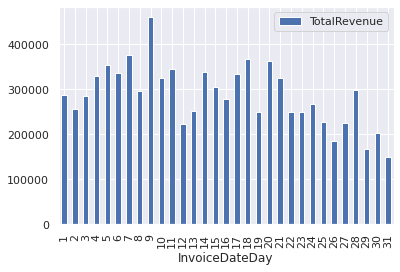

In [105]:
#szybki wykres
import seaborn as sns
sns.set()

_ = results.plot(kind = 'bar')

In [109]:
# SELECT * FROM retail ORDER BY Quantity DESC LIMIT 5;
#retail.sort_values('Quantity', ascending=False).head()
retail.nlargest(5, columns=['Quantity'])

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
InvoiceNo,,,,,,,,,
581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,9
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,18
578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0,25
573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.0,27
554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.0,27


In [110]:
# SELECT * FROM retail ORDER BY Quantity LIMIT 5;
#retail.sort_values('Quantity').head()
retail.nsmallest(5, columns=['Quantity'])

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
InvoiceNo,,,,,,,,,
536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom,1.25,1
536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85,1
536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom,2.55,1
536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom,1.95,1
536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom,2.95,1
